In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
def dB(d):
    return 10*np.log10(d)
def lin(d):
    return 10**(d/10)

In [3]:
fn = 'output0001.dat'
f = open(fn,'rb')

#header_fmt = "=iiiidiiiId" #format for struct package
header_fmt = np.dtype([('frame_length',  np.int32),
                       ('frame_header',  np.int32),
                       ('frame_samples', np.int32),
                       ('frame_dtype',   np.int32),
                       ('frame_raw_cad', np.float64),
                       ('frame_nfreq',   np.int32),
                       ('frame_nvis',    np.int32),
                       ('frame_int_len', np.int32),
                       ('frame_idx0',    np.uint32),
                       ('frame_utc0',    np.float64),
                      ])

header = np.fromfile(f,dtype=header_fmt,count=1)[0]
freqlist = np.fromfile(f,dtype=np.float32,count=2*header['frame_nfreq']).reshape(-1,2)
elemlist = np.fromfile(f,dtype=np.int8,count=header['frame_nvis'])

frame_fmt = np.dtype([('timestamp', np.float64),
                      ('data',      np.float32, header['frame_nfreq'])])
data = np.fromfile(f,dtype=frame_fmt)

In [4]:
intlen = header['frame_int_len']
freqbw = np.mean(freqlist[:,1]-freqlist[:,0])
print(freqbw,intlen)

9765.625 256


In [5]:
d = 10*np.log10(data['data'])
date = datetime.date.fromtimestamp(data['timestamp'][0])

Text(0, 0.5, 'Observation Time (2023-11-09)')

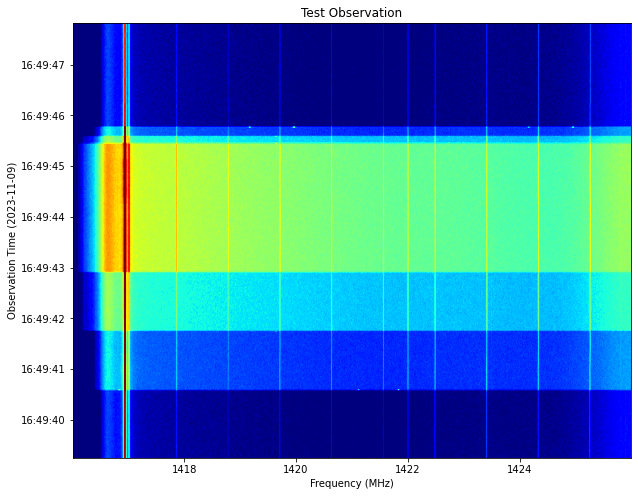

In [6]:
f,ax = plt.subplots(figsize=[10,8])
ax.imshow(d, aspect='auto',
          extent=[freqlist.mean(axis=1)[0]/1e6, freqlist.mean(axis=1)[-1]/1e6,
                  data['timestamp'][0]/86400., data['timestamp'][-1]/86400. ],
          vmin=-10,vmax=10,cmap='jet')
ax.yaxis_date(tz = 'Canada/Eastern')
plt.title('Test Observation')
plt.xlabel('Frequency (MHz)')
plt.ylabel('Observation Time ({})'.format(date))

Text(0, 0.5, 'Power (dB bits^2)')

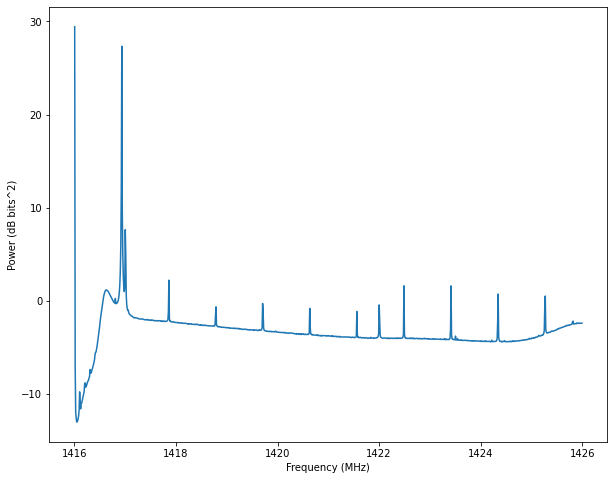

In [7]:
f,ax = plt.subplots(figsize=[10,8])
plt.plot(freqlist.mean(axis=1)/1e6,dB(data['data'].mean(axis=0)))
plt.xlabel('Frequency (MHz)')
plt.ylabel('Power (dB bits^2)')

Text(0, 0.5, 'Band-limited Power (dB bits^2)')

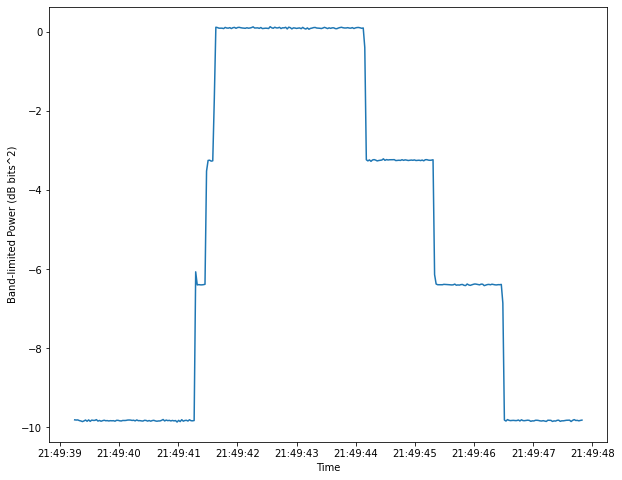

In [8]:
#pick out power between 1418 and 1424 MHz
q = np.where((freqlist[:,0] > 1418e6) * (freqlist[:,1] < 1424e6))[0]

f, ax = plt.subplots(figsize=[10,8])
plt.plot(data['timestamp']/86400.,dB(data['data'][:,q].mean(axis=1)))
plt.xlabel('Time')
ax.xaxis_date(tz = 'Canada/Easter')
plt.ylabel('Band-limited Power (dB bits^2)')